In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
import time
import pandas as pd
from numpy.linalg import norm
from itertools import count
from IPython import display
import seaborn as sns
from IPython.display import HTML
from scipy.io import loadmat
from operator_functions.pointer_func import pointer_vector
from operator_functions.AB_operator import A_operator,B_operator,uBC_Laplace,b_vector_creator
from operator_functions.Conjugate_gradient import CG_solver_transient,CG_solver
from operator_functions.bound_append import bound_appender

In [8]:
##diffusivity
alpha  = 0.005 ;
## Delta t
dt = 0.02 ;
## grid
Nx=31
Ny=40
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 
xv, yv = np.meshgrid(x, y, indexing='ij')
X,Y=np.meshgrid(xtotal, ytotal, indexing='ij')
kappa=0.02*np.exp(-((((xv-0.7)**2)/0.09)+(((yv-0.6)**2)/0.25)))
b=kappa/(alpha)
Q=np.zeros((Nx*Ny,1))
BCB=(-0.3)*np.ones(Nx)
BCL=0.5-0.5*np.cos(2*np.pi*y)
BCT=0.5+0.5*np.sin(4*np.pi*x-0.5*np.pi)
BCR=np.zeros(Ny)
cg_iter=10
b_residual_list=[]
cg_iter_list=[10,50,100,200,250]
for cg_iter in cg_iter_list:
    Steady_ss,Solution_Matrix,b_residual=CG_solver(Q,b,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR,cg_iter)
    b_residual_list.append(b_residual)

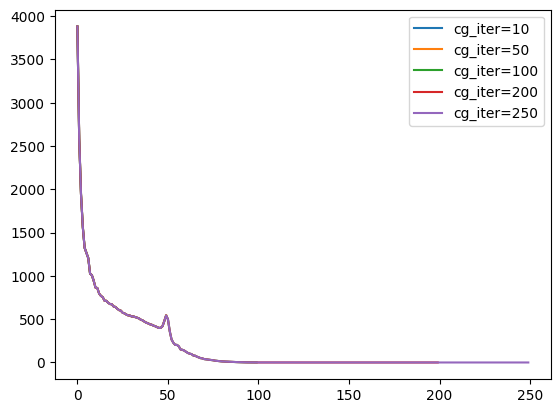

In [11]:
plt.plot([i for i in range(len(b_residual_list[0]))],b_residual_list[0],label=f"cg_iter={cg_iter_list[0]}")
plt.plot([i for i in range(len(b_residual_list[1]))],b_residual_list[1],label=f"cg_iter={cg_iter_list[1]}")
plt.plot([i for i in range(len(b_residual_list[2]))],b_residual_list[2],label=f"cg_iter={cg_iter_list[2]}")
plt.plot([i for i in range(len(b_residual_list[3]))],b_residual_list[3],label=f"cg_iter={cg_iter_list[3]}")
plt.plot([i for i in range(len(b_residual_list[4]))],b_residual_list[4],label=f"cg_iter={cg_iter_list[4]}")
plt.legend()
plt.show()

In [ ]:
##diffusivity
alpha  = 0.005 ;
## Delta t
dt_range = [0.01,0.1,1,10]
Nx=31
Ny=40
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 
xv, yv = np.meshgrid(x, y, indexing='ij')

X,Y=np.meshgrid(xtotal, ytotal, indexing='ij')
norm_list_total=[]
iter_list_total=[]
for dt in dt_range:
    ## grid
    kappa=dt*0.02*np.exp(-((((xv-0.7)**2)/0.09)+(((yv-0.6)**2)/0.25)))
    Q=np.zeros((Nx*Ny,1))
    BCB=(-0.3)*np.ones(Nx)
    BCL=0.5-0.5*np.cos(2*np.pi*y)
    BCT=0.5+0.5*np.sin(4*np.pi*x-0.5*np.pi)
    BCR=np.zeros(Ny)
    norm_list=[]
    iter_list=[]
    b_vector=b_vector_creator(kappa,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR,dt,alpha)
    for it in range(1000):
        b=A_operator(Q,Nx,Ny,dx,dy,dt,alpha)+b_vector
        Q,Solution_Matrix=CG_solver_transient(Q,b,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR,dt,alpha)
        norm_l2 = (norm(Q-Steady_ss))/(norm(Steady_ss))
        if it%10==0:
            print(it*dt,norm_l2)
        norm_list.append(norm_l2)
        iter_list.append(it)
        if norm_l2<1e-4:
            break
    norm_list_total.append(norm_list)
    iter_list_total.append(iter_list)

In [ ]:
plt.plot([i for i in range(len(norm_list_total[0]))],norm_list_total[0],label=f"dt={dt_range[0]}")
plt.plot([i for i in range(len(norm_list_total[1]))],norm_list_total[1],label=f"dt={dt_range[1]}")
plt.plot([i for i in range(len(norm_list_total[2]))],norm_list_total[2],label=f"dt={dt_range[2]}")
plt.plot([i for i in range(len(norm_list_total[3]))],norm_list_total[3],label=f"dt={dt_range[3]}")
plt.legend()
plt.show()

In [ ]:
len(norm_list_total[3])

In [ ]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(xv, yv, Solution_Matrix)
fig.colorbar(cp)
#ax.set_title('Filled Contours Plot')
ax.set_xlabel('x (units)')
ax.set_ylabel('y (units)')
plt.show()

In [ ]:
Nx=4
Ny=3
N=Nx*Ny
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 
matrix=[]
for i in range(N):
    Q=np.zeros((N,1))
    Q[i,0]=1
    matrix.append(list(A_operator(Q,Nx,Ny,dx,dy,dt,alpha)[:,0]))
matrx_data=pd.DataFrame(np.array(matrix))
matrx_data.columns=[i for i in matrx_data.columns]
matrx_data.index=[i for i in matrx_data.index]
inverted_matrix=np.linalg.inv(np.array(matrix))
matrix_inverse=pd.DataFrame(inverted_matrix)
matrix_inverse.columns=[i for i in matrix_inverse.columns]
matrix_inverse.index=[i for i in matrix_inverse.index]



In [ ]:
Nx=4
Ny=3
N=Nx*Ny
xtotal  = np.linspace(0,1,Nx+2)
x=xtotal[1:Nx+1]
ytotal  = np.linspace(0,1,Ny+2)
y=ytotal[1:Ny+1]
dx = x[1] - x[0] 
dy=y[1] - y[0] 
matrix=[]
for i in range(N):
    Q=np.zeros((N,1))
    Q[i,0]=1
    matrix.append(list(B_operator(Q,Nx,Ny,dx,dy,dt,alpha)[:,0]))
matrx_data=pd.DataFrame(np.array(matrix))
matrx_data.columns=[i for i in matrx_data.columns]
matrx_data.index=[i for i in matrx_data.index]
inverted_matrix=np.linalg.inv(np.array(matrix))
matrix_inverse=pd.DataFrame(inverted_matrix)
matrix_inverse.columns=[i for i in matrix_inverse.columns]
matrix_inverse.index=[i for i in matrix_inverse.index]



In [ ]:
matrx_data

In [ ]:
b_vector=b_vector_creator(kappa,Nx,Ny,dx,dy,BCB,BCL,BCT,BCR,dt,alpha)
b=A_operator(Q,Nx,Ny,dx,dy,dt,alpha)+b_vector